In [1]:
# escludi da 16 a 27
import pandas as pd
import matplotlib.pyplot as plt
#!pip install squarify
import squarify
import numpy as np
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

surv = pd.read_csv("survey_ita.tsv",sep="\t").iloc[3:,3:].reset_index(drop=True)
surv2 = pd.read_csv("survey_ita_2.tsv",sep="\t").iloc[:,2:]
surv = pd.concat([surv, surv2],ignore_index=True)
surv.head(3)

Età    Genere  \
0  31 - 40  Maschile   
1  31 - 40  Maschile   
2  31 - 40  Maschile   

  Regione di appartenenza della struttura sanitaria in cui opera  \
0                                             Veneto               
1                                           Campania               
2                                            Toscana               

  Tipologia della struttura sanitaria  \
0            Azienda Sanitaria Locale   
1                 Azienda Ospedaliera   
2                 Azienda Ospedaliera   

  Ruolo professionale (è possibile indicare più di 1 risposta)  \
0                                         Psichiatra             
1                          Neuropsichiatra infantile             
2                                         Psichiatra             

  Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza?   \
0                                                 No                        
1                                                 Sì                        
2                                                 Sì                        

  Se ha risposto sì, qual è stata la motivazione principale del calo?   \
0                                                NaN                     
1                                           Lockdown                     
2                Interruzione di servizi non urgenti                     

  Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:  \
0                                                NaN                                       
1                                                  6                                       
2                                                  7                                       

  Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?  \
0                 Mista, prevalentemente in presenza                      
1                 Mista, prevalentemente in presenza                      
2  Mista, prevalentemente tramite strumenti telem...                      

  La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?  \
0                                                 Sì                                                  
1                                                 No                                                  
2                                                 Sì                                                  

   ...  \
0  ...   
1  ...   
2  ...   

  Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Valutazione/Monitoraggio di pazienti di nuovo esordio].1  \
0                                                NaN                                                                                                                         
1                                                NaN                                                                                                                         
2                           Telefono (chiamate, SMS)                                                                                                                         

  Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Gestione dell'emergenza].1  \
0                   Telefono (chiamate, SMS), e-mail                                                                                           
1                                                NaN                                                                                           
2                           Telefono (chiamate, SMS)                                                                                           

  Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Monitoraggio della terapia farmacologica].1  \
0                           Telefono (chia

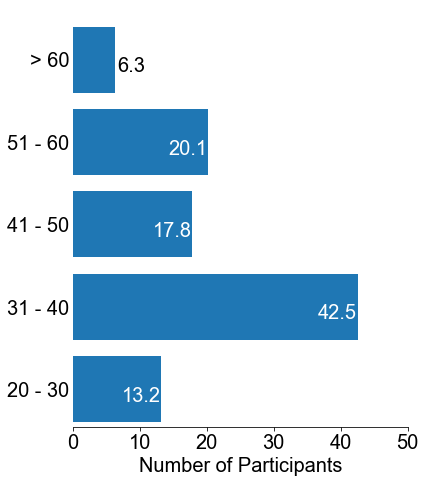

In [2]:
ages = surv["Età"].value_counts().sort_index()
ages = 100*(ages/ages.sum())
fig, ax1 = plt.subplots(figsize=(6,8))

ax1.barh(ages.index,ages.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -15))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("Number of Participants")

for i,(ind,n) in enumerate(ages.iteritems()):
    if n>=10:
        plt.text(x = n-5.9 , y = i-.15 , s = np.round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.3 , y = i-.15 , s = np.round(n,1) , size = 20, color="black")

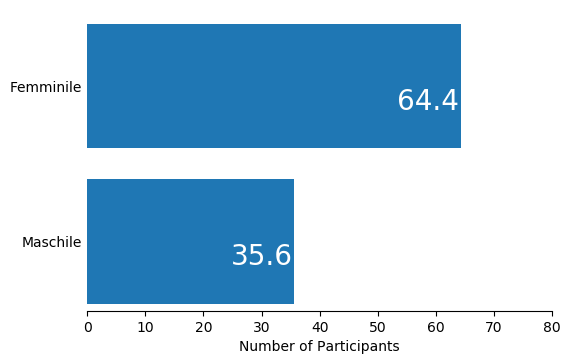

In [3]:
plt.style.use('default')
gender = surv["Genere"].value_counts().sort_index(ascending=False)
gender = 100*(gender/gender.sum())

fig, ax1 = plt.subplots(figsize=(6,4))

ax1.barh(gender.index,gender.values,)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -5))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,80))
ax1.set_xlabel("Number of Participants")

for i,(ind,n) in enumerate(gender.iteritems()):
    if n>=10:
        plt.text(x = n-11 , y = i-.15 , s = np.round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.3 , y = i-.15 , s = np.round(n,1) , size = 20, color="black")


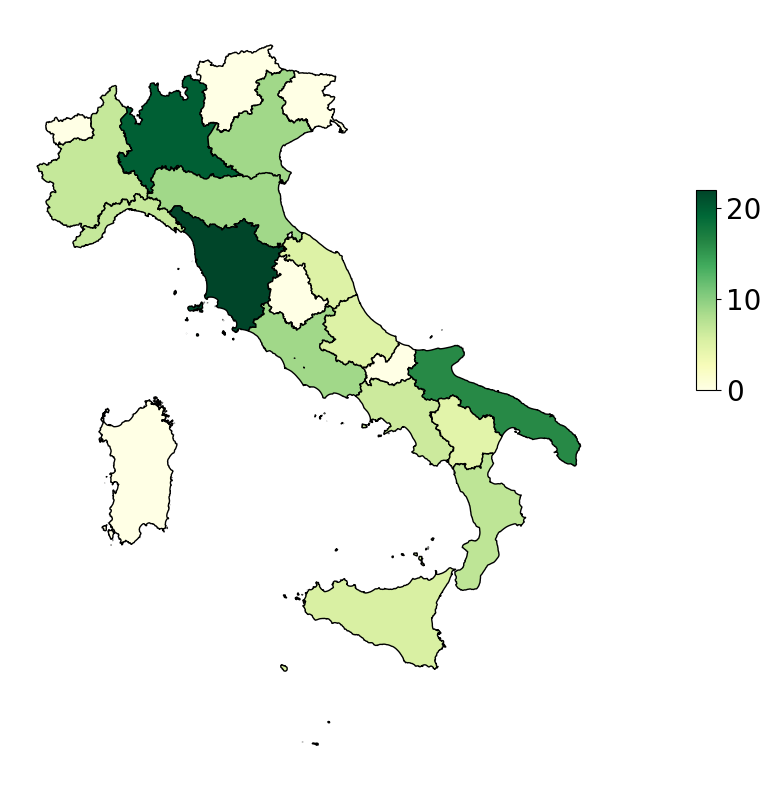

In [4]:
import geopandas as gpd
import os
import geopandas as gpd
import pandas as pd
italy = gpd.read_file(os.getcwd() + '\\italy\\reg2011_g.shp')

temp =  surv["Regione di appartenenza della struttura sanitaria in cui opera"].value_counts().reset_index().rename(columns={"index":"regione","Regione di appartenenza della struttura sanitaria in cui opera":"num"})
temp["regione"] = temp["regione"].apply(lambda x: x.upper())
for_plotting = italy.merge(temp, left_on = 'NOME_REG', right_on = 'regione',how="outer")
for_plotting["num"].fillna(-10, inplace=True,)
for_plotting.head(20)

fig, ax =plt.subplots(figsize=(10,10))
for_plotting.plot(column='num', 
                  cmap = 'YlGn', ax=ax  ,legend = False,
                    scheme=None, k=3,
                    edgecolor="black",facecolor="white")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

cax = fig.add_axes([.9, 0.5, 0.02, 0.2])
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=20) 

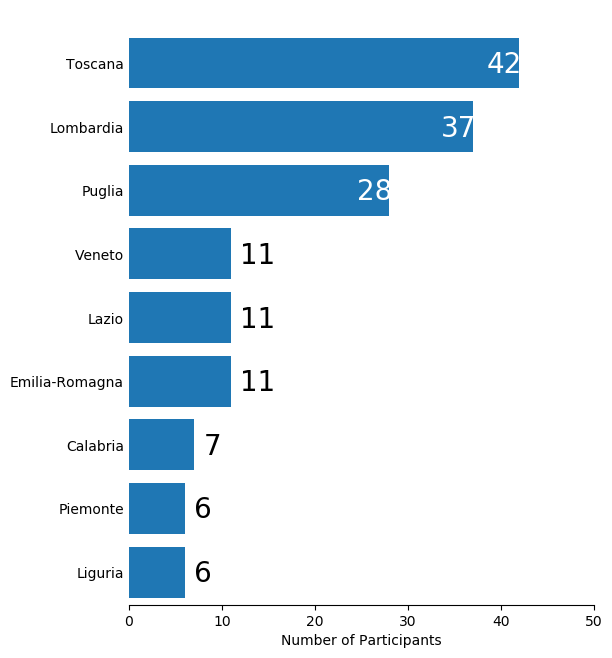

In [5]:
nations = surv["Regione di appartenenza della struttura sanitaria in cui opera"].value_counts()[0:9].sort_values(ascending=True)
fig, ax1 = plt.subplots(figsize=(6,8))

ax1.barh([n.title() for n in nations.index],nations.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -15))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("Number of Participants")

for i,(ind,n) in enumerate(nations.iteritems()):
    if n>=20:
        plt.text(x = n-3.5 , y = i-.15 , s = n , size = 20, color="white")
    else:
        plt.text(x = n+1 , y = i-.15 , s = n , size = 20, color="black")

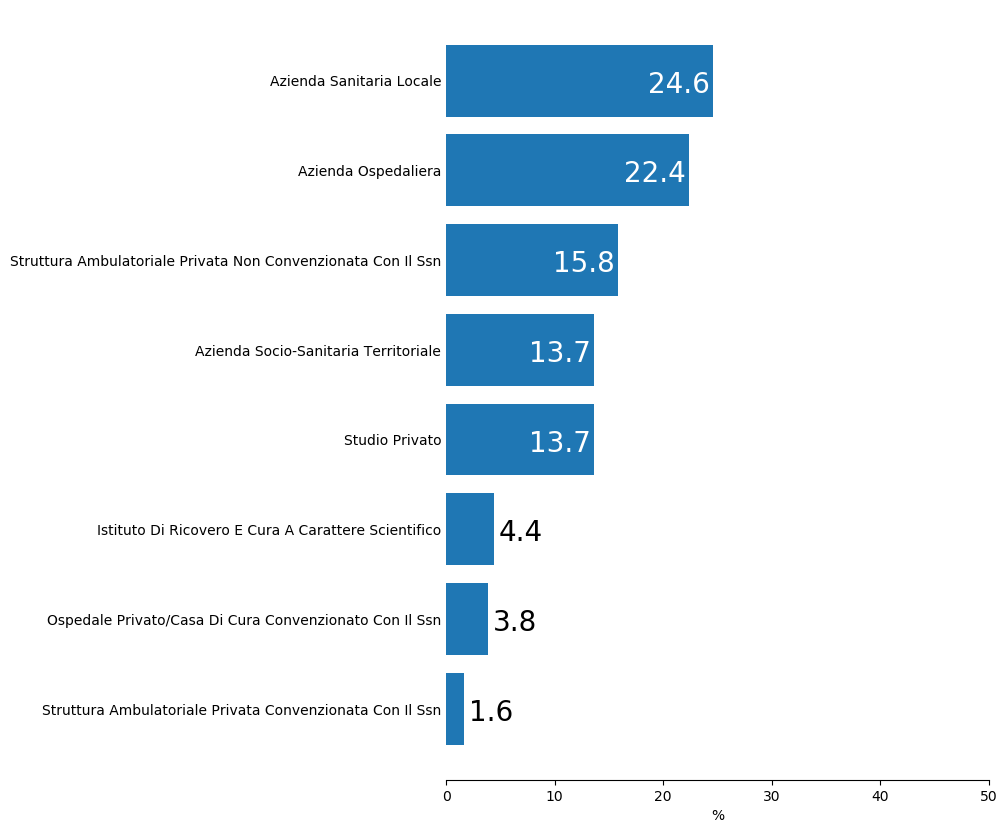

In [6]:
from collections import Counter
plt.style.use('default')

tms = [x.lower().strip() for s in surv['Tipologia della struttura sanitaria'].dropna() for x in s.split(", ")]
for i,c in enumerate(tms):
    if c in ['libero professionista','libera professione','studio professionale','studio libera professione','studio privato non convenzionato con ssn','privato']:
        tms[i] = 'studio privato'
    elif c in ['rsp','centro diurno','centro diurno psichiatrico']:
        tms[i] = 'ospedale privato/casa di cura convenzionato con il ssn'
    elif c in ['policlinico universitario','ser.d']:
        tms[i] = 'istituto di ricovero e cura a carattere scientifico'
    elif c in ['comunità terapeutica psichiatrica (cooperativa sociale)']:
        tms[i] = 'struttura ambulatoriale privata non convenzionata con il ssn'
    elif c in ["residenza per l'esecuzione di misure di sicurezza"]:
        tms[i] = 'azienda socio-sanitaria territoriale'
        

tms = Counter(tms).most_common()
tms =pd.DataFrame(tms).rename(columns = {0:"name",1:"value"}).sort_values(by="value",ascending=True).reset_index(drop=True)
tms["value"] = 100*(tms["value"]/tms["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in tms["name"]],tms["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,n in tms.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-6 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>5:
        plt.text(x = n["value"]-4 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>0:
        plt.text(x = n["value"]+.5 , y = i-.13 , s = round(n["value"],1) , size = 20, color="black")
plt.show()

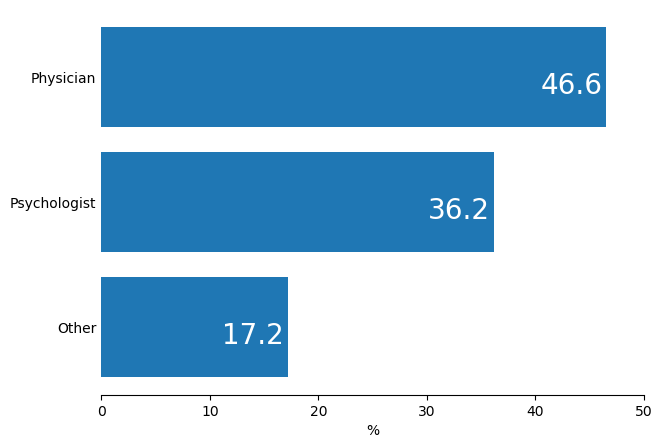

In [7]:
ruolo = surv["Ruolo professionale (è possibile indicare più di 1 risposta)"].dropna()
ruolo = [rs.split(",")[0].strip().lower() for rs in ruolo]

# Physician,psychologist[include psychoterapia e ], other
for i,r in enumerate(ruolo):
    if r in ['psichiatra','medico specializzando','neuropsichiatra infantile','medico igienista','neurologo']:
        ruolo[i] = 'Physician'
    if r in ['psicoterapeuta','psicologo/a','consulente legale']:
        ruolo[i] = 'psychologist'
    if r in ['dietista', 'infermiere/a specializzato/a','neuropsichiatra infantile','tnpee','tecnico/a della riabilitazione psichiatrica','educatrice di centro sociale','educatore','educatore professionale','assistente sanitaria']:
        ruolo[i] = 'other'
        

ruolo = Counter(ruolo).most_common()

ruolo =pd.DataFrame(ruolo).rename(columns = {0:"name",1:"value"}).sort_values(by="value").reset_index(drop=True)
ruolo["value"] = 100*(ruolo["value"]/ruolo["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,5))
ax1.barh([n.title() for n in ruolo["name"]],ruolo["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,n in ruolo.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-6.1 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>5:
        plt.text(x = n["value"]-4 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>0:
        plt.text(x = n["value"]+.5 , y = i-.13 , s = round(n["value"],1) , size = 20, color="black")
plt.show()

In [8]:
print(surv.columns[5])
surv[surv.columns[5]].value_counts()

Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza? 


Sì    134
No     40
Name: Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza? , dtype: int64

In [9]:
print(surv.columns[6])
worked = surv[surv.columns[6]].apply(lambda x: x.strip().lower() if type(x)!=float else np.nan).dropna().reset_index(drop=True)

for i,w in enumerate(worked):
    if w in ["ho contratto l'infezione","quarantena preventiva a seguito di rilevazione di temperatura oltre 37.0 anche se in assenza di altri sintomi"]:
        worked[i] = "quarantine"
    if w in ["interruzione di servizi non urgenti", "la mia struttura è stata riconvertita a clinica covid","riduzione attività ambulatoriali","tutti i colloqui psicologici sono stati rimandati","alternanza settimanale dell'equipe"]:
        worked[i] = "service reduction"
    if w in ["difficoltà economiche persone, indisponibilità prosecuzione terapia in modalità online, priorità alla preoccupazione per la pandemia e idealizzazione relazioni (tutti insieme a casa) e/o banalizzazione problemi"]:
        worked[i] ="lockdown"
        
worked.value_counts().sort_values(ascending=True)

Se ha risposto sì, qual è stata la motivazione principale del calo? 


quarantine            2
lockdown             58
service reduction    73
Name: Se ha risposto sì, qual è stata la motivazione principale del calo? , dtype: int64

Se ha risposto sì, qual è stata la motivazione principale del calo? 


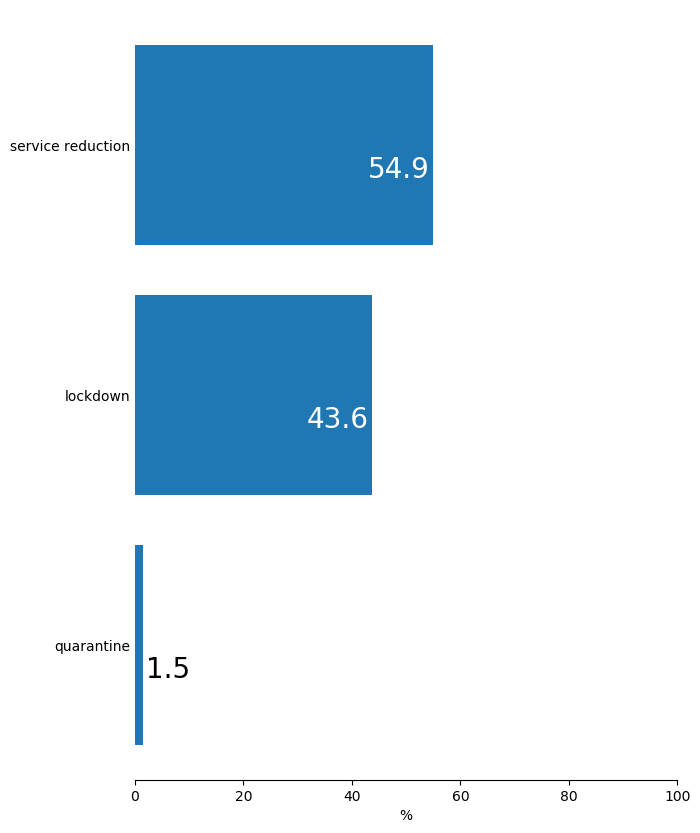

In [10]:
print(surv.columns[6])
worked = surv[surv.columns[6]].apply(lambda x: x.strip().lower() if type(x)!=float else np.nan).dropna().reset_index(drop=True)

for i,w in enumerate(worked):
    if w in ["ho contratto l'infezione","quarantena preventiva a seguito di rilevazione di temperatura oltre 37.0 anche se in assenza di altri sintomi"]:
        worked[i] = "quarantine"
    if w in ["interruzione di servizi non urgenti", "la mia struttura è stata riconvertita a clinica covid","riduzione attività ambulatoriali","tutti i colloqui psicologici sono stati rimandati","alternanza settimanale dell'equipe"]:
        worked[i] = "service reduction"
    if w in ["difficoltà economiche persone, indisponibilità prosecuzione terapia in modalità online, priorità alla preoccupazione per la pandemia e idealizzazione relazioni (tutti insieme a casa) e/o banalizzazione problemi"]:
        worked[i] ="lockdown"
        
worked = worked.value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:
0    7
dtype: object


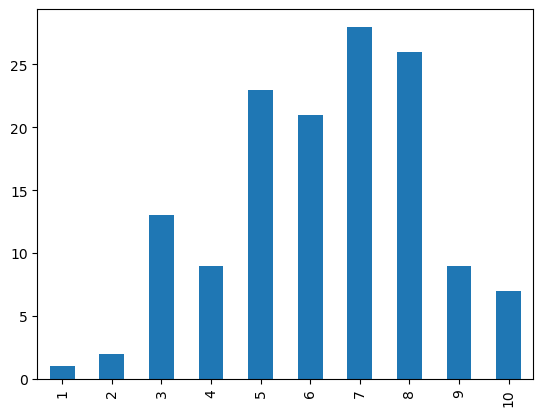

In [11]:
print(surv.columns[7])
temp = pd.Series([int(i) for i in surv[surv.columns[7]].dropna()] ).value_counts()
print(surv[surv.columns[7]].dropna().mode())
#temp.index =  [int(i) for i in temp.index]

temp.sort_index().plot(kind="bar")

Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?


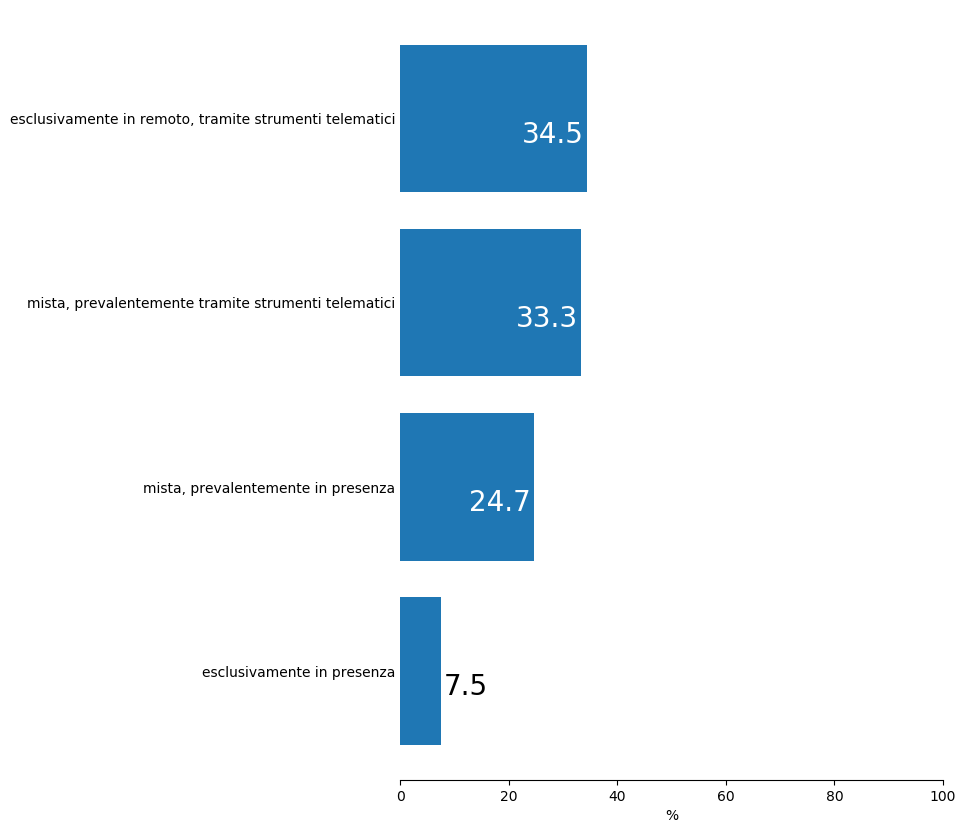

In [12]:
# combinato professioni e prima dopo
# separatamente per le diverse professioni
# TM 
# mostly TM
# mostly FtF
# FtF

print(surv.columns[8])
worked = surv[surv.columns[8]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?


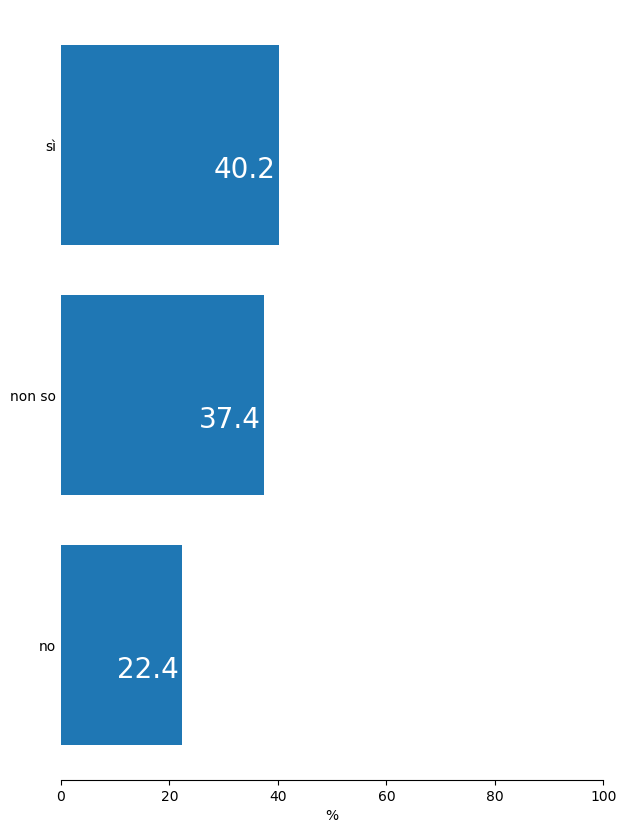

In [13]:
# yes,no,dnk
print(surv.columns[9])
worked = surv[surv.columns[9]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Quali tra i seguenti strumenti telematici ha utilizzato DURANTE l'emergenza per raggiungere e fornire supporto ai pazienti?


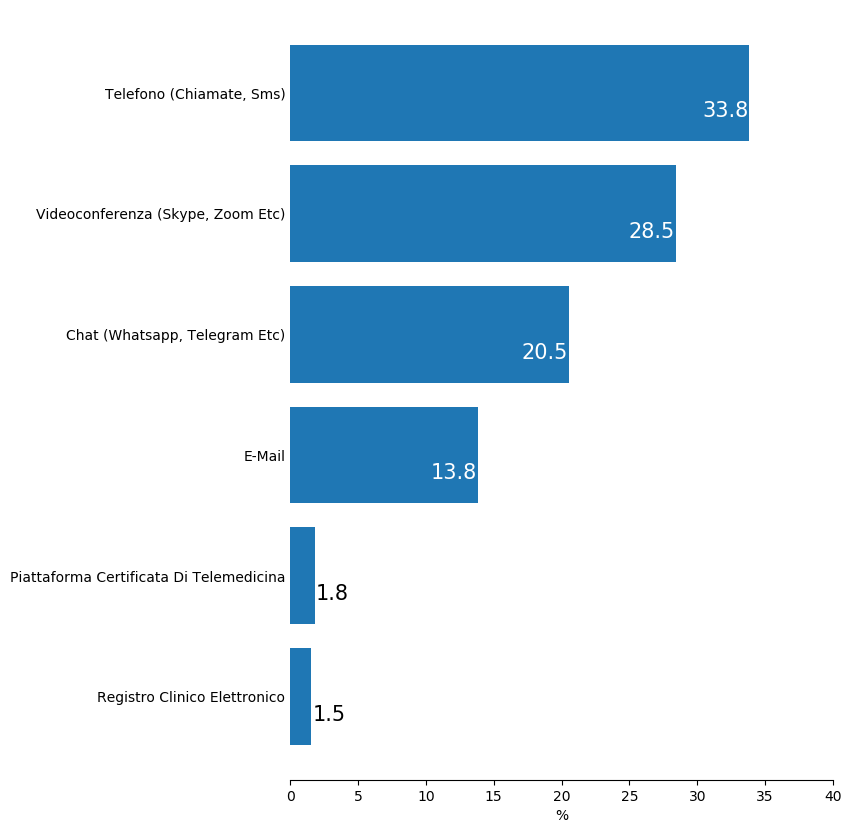

In [14]:
print(surv.columns[10])
# grafico combinato prima e durante solo italiani
# phone
# vtc [videoconf]
# im
# email
# stm
# ehr []
import re 

services = surv[surv.columns[10]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


Ruolo professionale (è possibile indicare più di 1 risposta)
Quali tra i seguenti strumenti telematici ha utilizzato DURANTE l'emergenza per raggiungere e fornire supporto ai pazienti?
Quali tra i seguenti strumenti telematici utilizzava PRIMA dell'emergenza per raggiungere e fornire supporto ai pazienti?
[None, None, None]


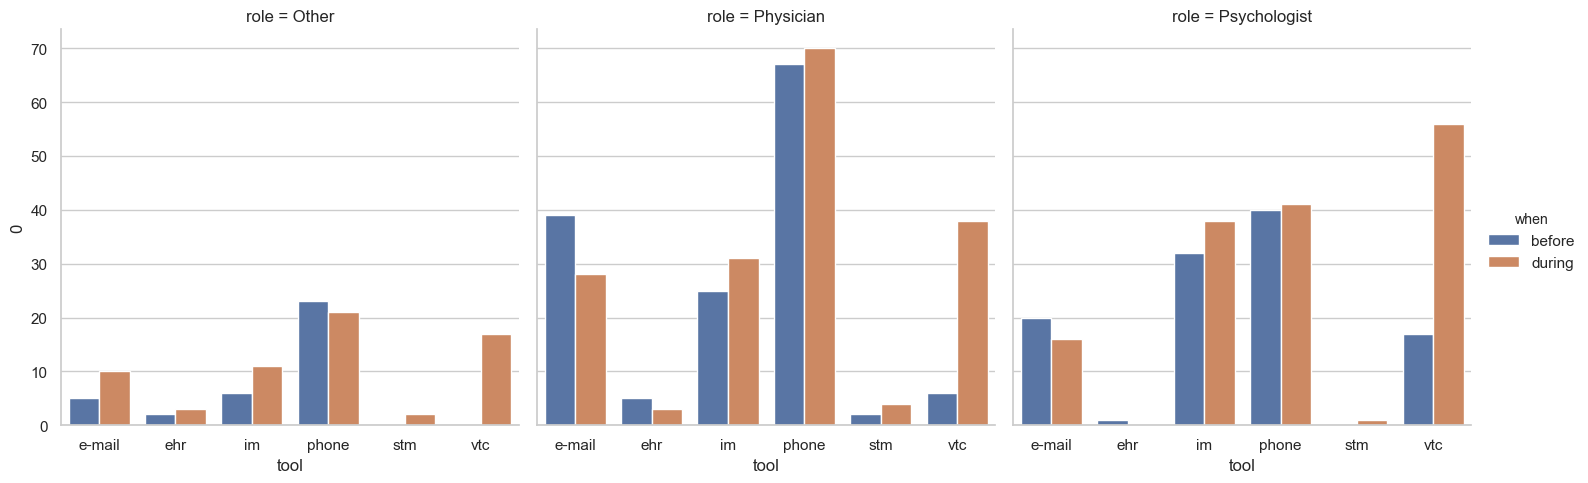

In [106]:
print([print(x) for x in surv.columns[[4,10,15]]])
durante = surv[surv.columns[[4,10]]].dropna().reset_index(drop=True).copy()
prima = surv[surv.columns[[4,15]]].dropna().reset_index(drop=True).copy()
durante.columns=["role","tool"]
prima.columns=["role","tool"]

def work(x):
    x = x.lower().split(",")[0].strip() # primary occupation
    if x in ['psichiatra','medico specializzando','neuropsichiatra infantile','medico igienista','neurologo']:
        x = 'Physician'
    elif x in ['psicoterapeuta','psicologo/a','consulente legale']:
        x = 'Psychologist'
    elif x in ['dietista', 'infermiere/a specializzato/a','neuropsichiatra infantile','tnpee','tecnico/a della riabilitazione psichiatrica','educatrice di centro sociale','educatore','educatore professionale','assistente sanitaria']:
        x = 'Other'
    return x

durante.iloc[:,0] = durante.iloc[:,0].apply(work)
prima.iloc[:,0] = prima.iloc[:,0].apply(work)

r = re.compile(r'(?:[^,(]|\([^)]*\))+')

def tools(x):
    temp = [t.lower().strip() for t in r.findall(x)]
    for i,c in enumerate(temp):
        if c in ["telefono (chiamate, sms)"]:
            temp[i]= "phone"
        elif c in ["videoconferenza (skype, zoom etc)"]:
            temp[i]= "vtc"
        elif c in ["chat (whatsapp, telegram etc)"]:
            temp[i]= "im"
        elif c in ["registro clinico elettronico"]:
            temp[i]= "ehr"
        elif c in ['piattaforma certificata di telemedicina']:
            temp[i]= "stm"
    return temp

durante.iloc[:,1] = durante.iloc[:,1].apply(tools)
prima.iloc[:,1] = prima.iloc[:,1].apply(tools)


durante = durante.explode("tool").reset_index(drop=True)
prima = prima.explode("tool").reset_index(drop=True)

prima = prima.groupby(["role","tool"]).size().reset_index()
prima["when"] = "before"
durante = durante.groupby(["role","tool"]).size().reset_index()
durante["when"] = "during"

alt = pd.concat([prima,durante])

sns.catplot(data=alt,x="tool",y=0,hue="when",col="role",kind="bar")


Quale percentuale delle sue prestazioni ha erogato tramite strumenti telematici DURANTE l'emergenza?


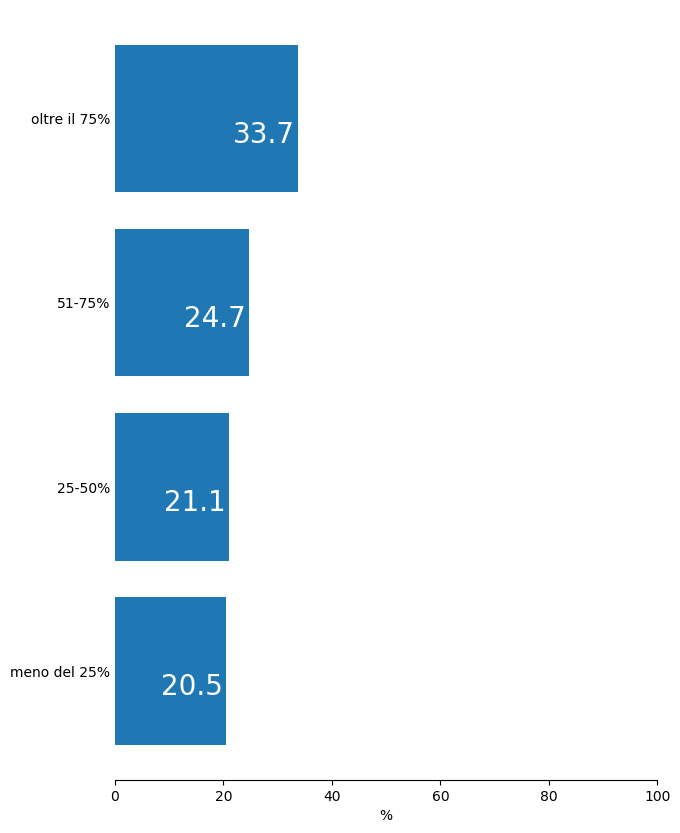

In [17]:
print(surv.columns[12])
# prima durante nelle professioni
worked = surv[surv.columns[12]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Ruolo professionale (è possibile indicare più di 1 risposta)
Quale percentuale delle sue prestazioni ha erogato tramite strumenti telematici DURANTE l'emergenza?
Quale percentuale delle sue prestazioni erogava tramite strumenti telematici PRIMA dell'emergenza ?
[None, None, None]


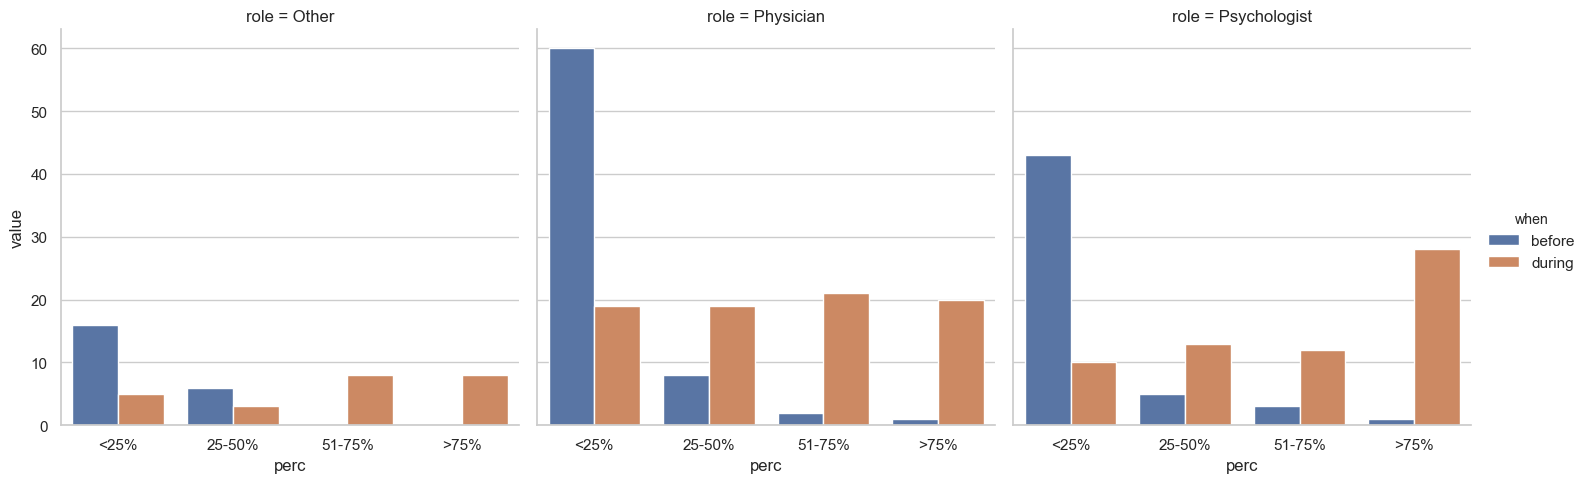

In [410]:

#print([print(i,c) for i,c in enumerate(surv.columns)])
print([print(x) for x in surv.columns[[4,12,28]]])
#12,28
durante = surv[surv.columns[[4,12]]].dropna().reset_index(drop=True).copy()
prima = surv[surv.columns[[4,28]]].dropna().reset_index(drop=True).copy()
durante.columns=["role","perc"]
prima.columns=["role","perc"]

durante.iloc[:,0] = durante.iloc[:,0].apply(work)
prima.iloc[:,0] = prima.iloc[:,0].apply(work)

def perce(x):
    x=x.lower()

    if x in ["meno del 25%"]:
        x = "<25%"
    elif x in ["oltre il 75%"]:
        x = ">75%"
    return x

durante.iloc[:,1] = durante.iloc[:,1].apply(perce)
prima.iloc[:,1] = prima.iloc[:,1].apply(perce)

prima = prima.groupby(["role","perc"]).size().reset_index()
prima["when"] = "before"
durante = durante.groupby(["role","perc"]).size().reset_index()
durante["when"] = "during"

alt = pd.concat([prima,durante])
alt = alt.rename(columns={0:"value"})
sns.catplot(data=alt,x="perc",y="value",hue="when",col="role",kind="bar",order=['<25%', '25-50%', '51-75%', '>75%'])

Ruolo professionale (è possibile indicare più di 1 risposta)
Quale percentuale delle sue prestazioni ha erogato tramite strumenti telematici DURANTE l'emergenza?
Quale percentuale delle sue prestazioni erogava tramite strumenti telematici PRIMA dell'emergenza ?
[None, None, None]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
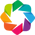

:Layout
   .Sankey.I  :Sankey   [role,perc]   (value)
   .Sankey.II :Sankey   [role,perc]   (value)

In [428]:
import holoviews as hv

print([print(x) for x in surv.columns[[4,12,28]]])
hv.extension('bokeh')


alt["comb"] = alt.perc+" "+alt.when

sankey1 = hv.Sankey(alt[alt["when"]=="before"], kdims=["role", "perc"], vdims=["value"])

sankey1.opts(cmap='Colorblind',label_position='outer',
                                 edge_color='role', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=500, height=400, bgcolor="white",
                                 title="before")

sankey2 = hv.Sankey(alt[alt["when"]=="during"], kdims=["role", "perc"], vdims=["value"])

sankey2.opts(cmap='Colorblind',label_position='outer',
                                 edge_color='role', edge_line_width=0,
                                 node_alpha=1.0, node_width=40, node_sort=True,
                                 width=500, height=400, bgcolor="white",
                                 title="during")

sankey = sankey1+sankey2

hv.save(sankey, 'prestazioni erogate.png', fmt='auto')

sankey

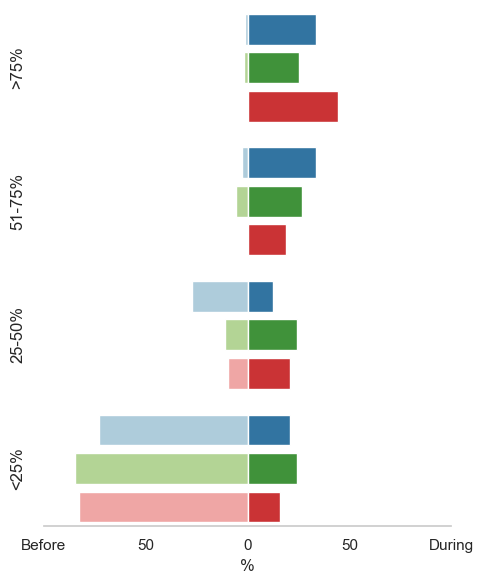

In [429]:
bef = alt["when"]=="before"
dur = alt["when"]=="during"

for r in alt["role"].unique():
    rl = alt["role"]==r
    alt.loc[bef & rl,"value"]= -100 * ( alt.loc[bef & rl,"value"] / alt.loc[bef & rl,"value"].sum())    
    alt.loc[dur & rl,"value"]= 100 * ( alt.loc[dur & rl,"value"] / alt.loc[dur & rl,"value"].sum())    
    
percs = ['<25%', '25-50%', '51-75%', '>75%']
percs.reverse()

fig,axs = plt.subplots(len(percs),1,figsize=(5,6))

for j,ax in enumerate(axs):
    temp = alt[alt["perc"]==percs[j]]
    when_c = dict(before=['#a6cee3','#b2df8a','#fb9a99'],during=['#1f78b4','#33a02c','#e31a1c'])
    for i,w in enumerate(["before","during"]):
        when = temp[temp["when"]==w]
        sns.barplot(ax = ax, data=when,x="value",y="role",palette=when_c[w])
        ax.set_ylabel(percs[j])
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False) 
        ax.set_xlim(-100,100)
        if j!=len(percs)-1:
            ax.spines['bottom'].set_visible(False)
            ax.set_xlabel("")
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("%")
            ax.set_xticks((-100,-50,0,50,100))
            
            ax.set_xticklabels(["Before","50","0","50","During"])
    ax.set_yticklabels([])
plt.tight_layout()


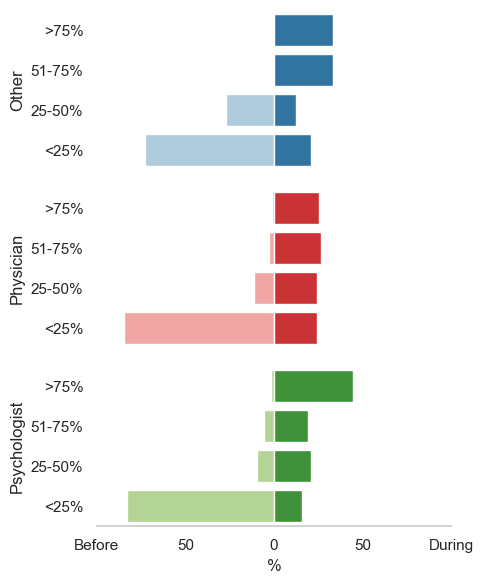

In [430]:

#plt.figure(figsize=(8,8), dpi= 80)
fig,axs = plt.subplots(3,1,figsize=(5,6))
role = alt["role"].unique()
role_c = dict(Other=['#a6cee3','#1f78b4'],Psychologist=['#b2df8a','#33a02c'],Physician=['#fb9a99','#e31a1c'])
for i,ax in enumerate(axs):
    temp = alt[alt["role"]==role[i]]
    # Draw Plot
    group_col = 'when'
    order_of_bars = ['<25%', '25-50%', '51-75%', '>75%']
    order_of_bars.reverse()
    colors = role_c[role[i]]

    for c, group in zip(colors, temp[group_col].unique()):
        gt = temp.loc[temp[group_col]==group, :]
        gt["value"] = 100 * (gt["value"]/gt["value"].sum())*np.sign(gt["value"])
        sns.barplot(ax=ax, x='value', y='perc', data=gt, order=order_of_bars, color=c, label=group,ci=None)


    ax.set_xlim(-100,100)
    ax.set_ylabel(role[i])
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False) #axis="y",which="minor")
    
    if i!=2:
        ax.spines['bottom'].set_visible(False)
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("%")
        ax.set_xticks((-100,-50,0,50,100))
        ax.set_xticklabels(["Before","50","0","50","During"])
    


plt.tight_layout()
plt.show()

Quanto ritiene che gli strumenti telematici le siano stati utili DURANTE l'emergenza per raggiungere e fornire supporto soddisfacente ai pazienti?
0    5.0
dtype: float64


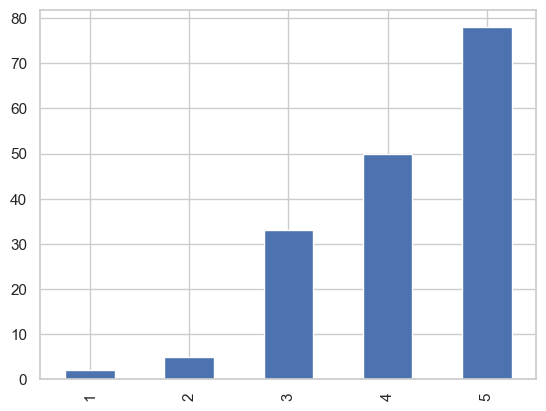

In [463]:
print(surv.columns[13])
#prima durante viola [non ha un prima]
temp = pd.Series([int(i) for i in surv[surv.columns[13]].dropna()] ).value_counts()
print(surv[surv.columns[13]].dropna().mode())
#temp.index =  [int(i) for i in temp.index]

temp.sort_index().plot(kind="bar")

[Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

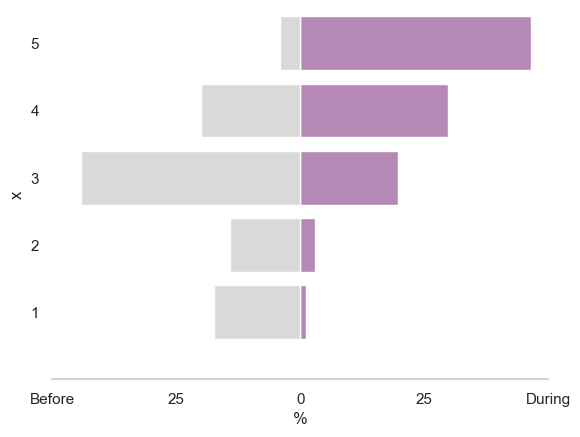

In [504]:
useful = surv[surv.columns[[13,29]]].apply(pd.Series.value_counts).reset_index().rename(columns={"index":"x","Quanto ritiene che gli strumenti telematici le siano stati utili DURANTE l'emergenza per raggiungere e fornire supporto soddisfacente ai pazienti?":"during","PRIMA dell'emergenza, quanto riteneva utili gli strumenti telematici per raggiungere e fornire supporto soddisfacente ai pazienti ?":"before"})

useful.iloc[:,1:] = 100 * ( useful.iloc[:,1:]/useful.iloc[:,1:].sum() )

during = useful.iloc[:,[0,1]]
during["x"] = during["x"].apply(lambda x: str(x) + "l")
during = during.sort_values(by="x",ascending=False)
before = useful.iloc[:,[0,2]]
before.iloc[:,1] = before.iloc[:,1] * -1
before["x"] = before["x"].apply(lambda x: str(x) + "l")

fig, ax = plt.subplots()

sns.barplot( y='x', x='during', data=during, color='#bc80bd',ci=None)
sns.barplot( y='x', x='before', data=before, color="#d9d9d9",ci=None)

ax.set_xlim(-50,50)
#ax.set_ylabel(role[i])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False) #axis="y",which="minor")

ax.set_xlabel("%")
ax.set_xticks((-50,-25,0,25,50))
ax.set_xticklabels(["Before","25","0","25","During"])
ax.set_yticks((0,1,2,3,4,5))
ax.set_yticklabels([5,4,3,2,1,])


Gli strumenti telematici, che ha utilizzato durante l'emergenza, erano disponibili nella sua struttura?


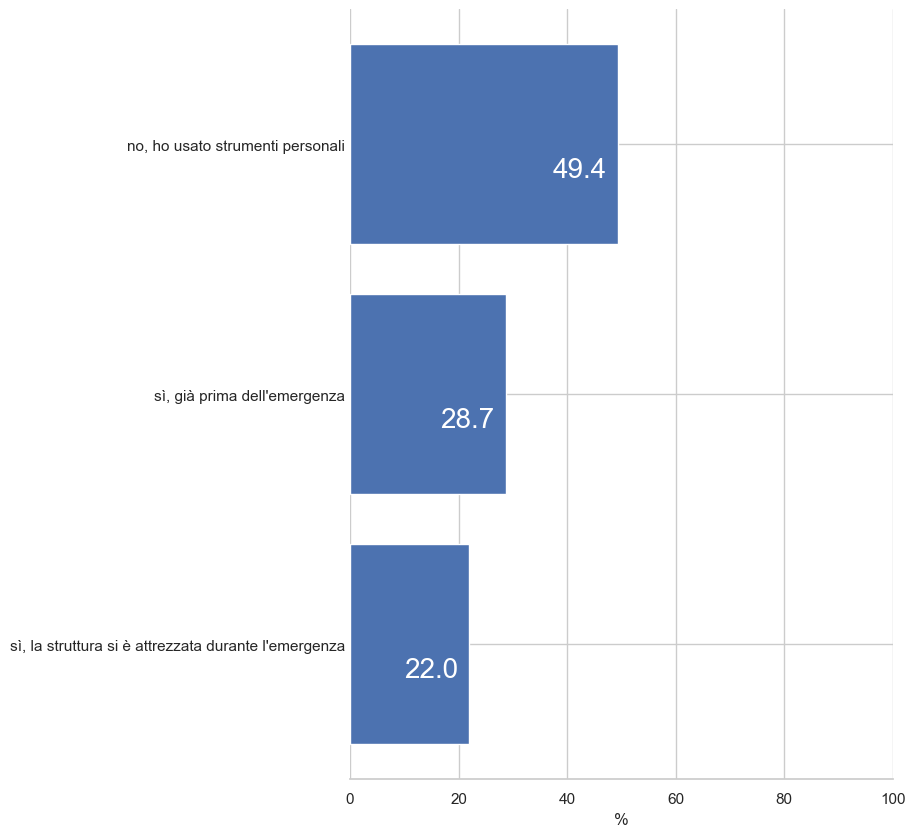

In [465]:
print(surv.columns[14])
# no grafico
worked = surv[surv.columns[14]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Quali tra i seguenti strumenti telematici utilizzava PRIMA dell'emergenza per raggiungere e fornire supporto ai pazienti?


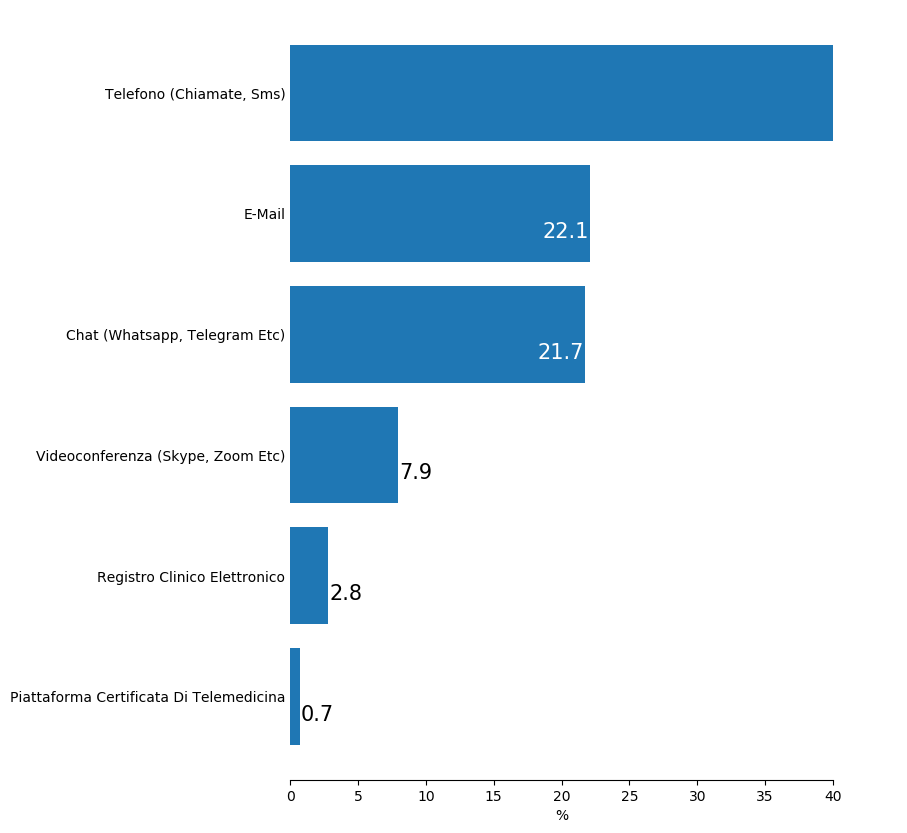

In [20]:
print(surv.columns[15])
worked = surv[surv.columns[15]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

services = surv[surv.columns[15]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


Quale percentuale delle sue prestazioni erogava tramite strumenti telematici PRIMA dell'emergenza ?


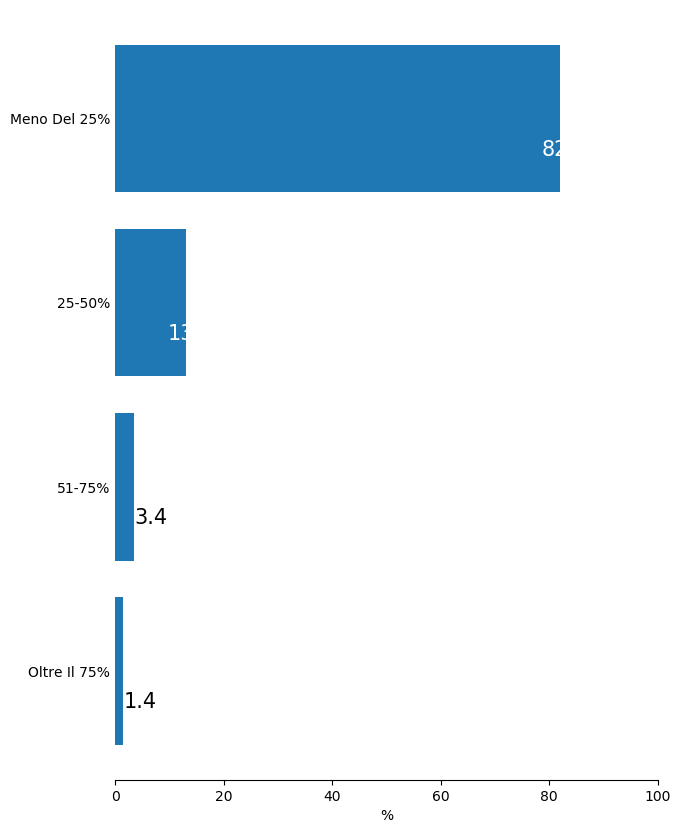

In [21]:
inc=28
print(surv.columns[inc])
worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()

Quale percentuale delle sue prestazioni erogava tramite strumenti telematici PRIMA dell'emergenza ?


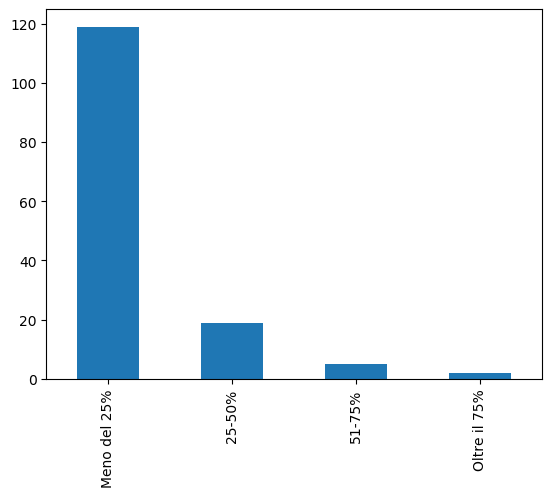

In [22]:

print(surv.columns[inc])

surv[surv.columns[inc]].dropna().value_counts().plot(kind="bar")

Continuerà ad utilizzare strumenti telematici nella sua pratica clinica DOPO l'emergenza?


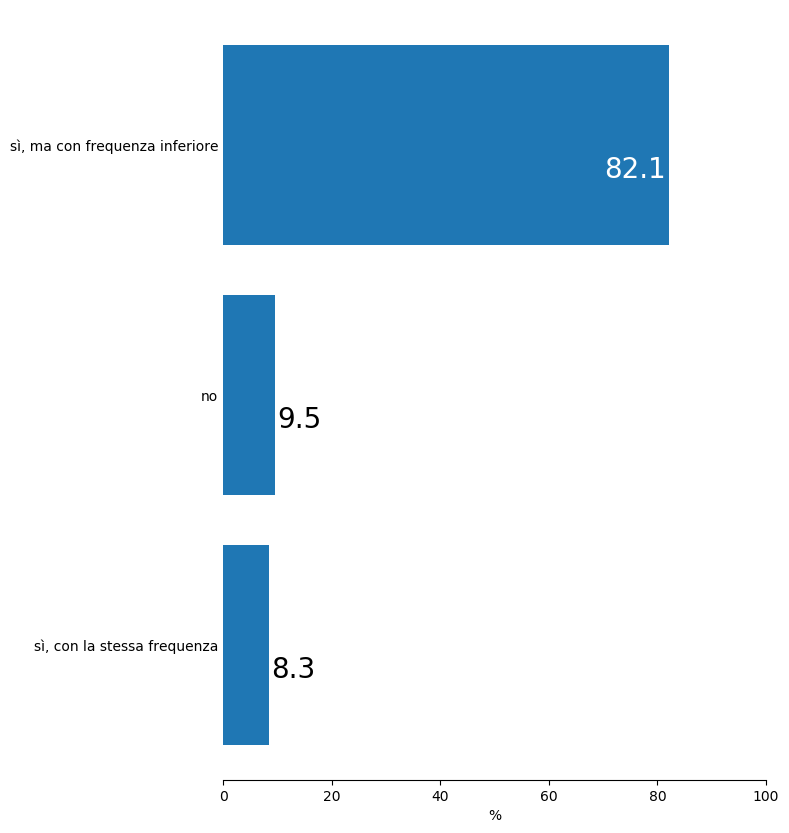

In [23]:
inc=30
#no grafico
print(surv.columns[inc])
surv[surv.columns[inc]]

worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()


Per quali fasce di età ritiene che l'impiego di strumenti telematici sia più utile e vantaggioso?


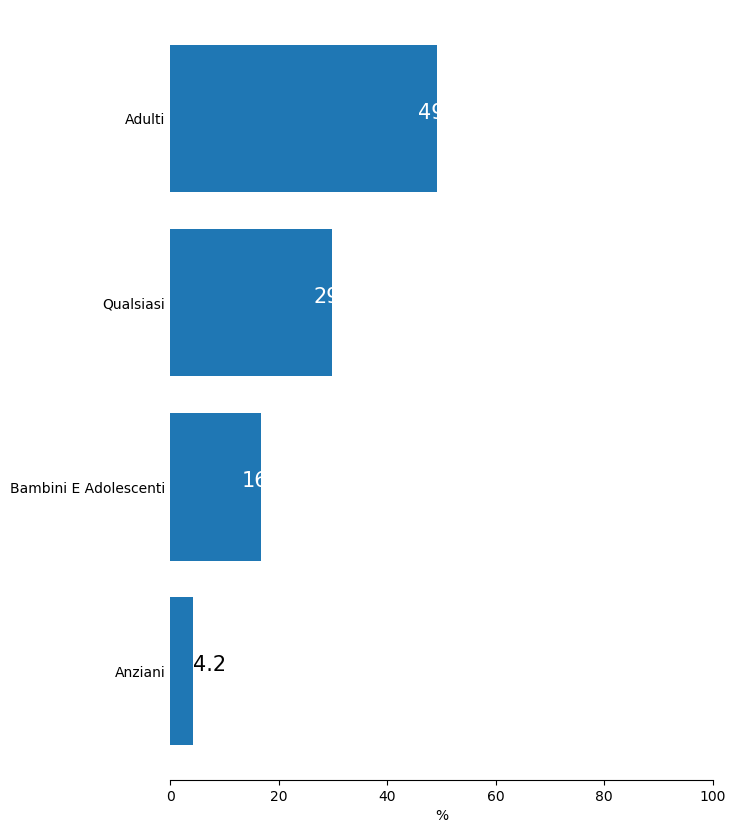

In [24]:
inc=31
# no grafico [o pazzo]
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

In quali popolazioni ritiene che l'uso di strumenti telematici sia più utile e vantaggioso?


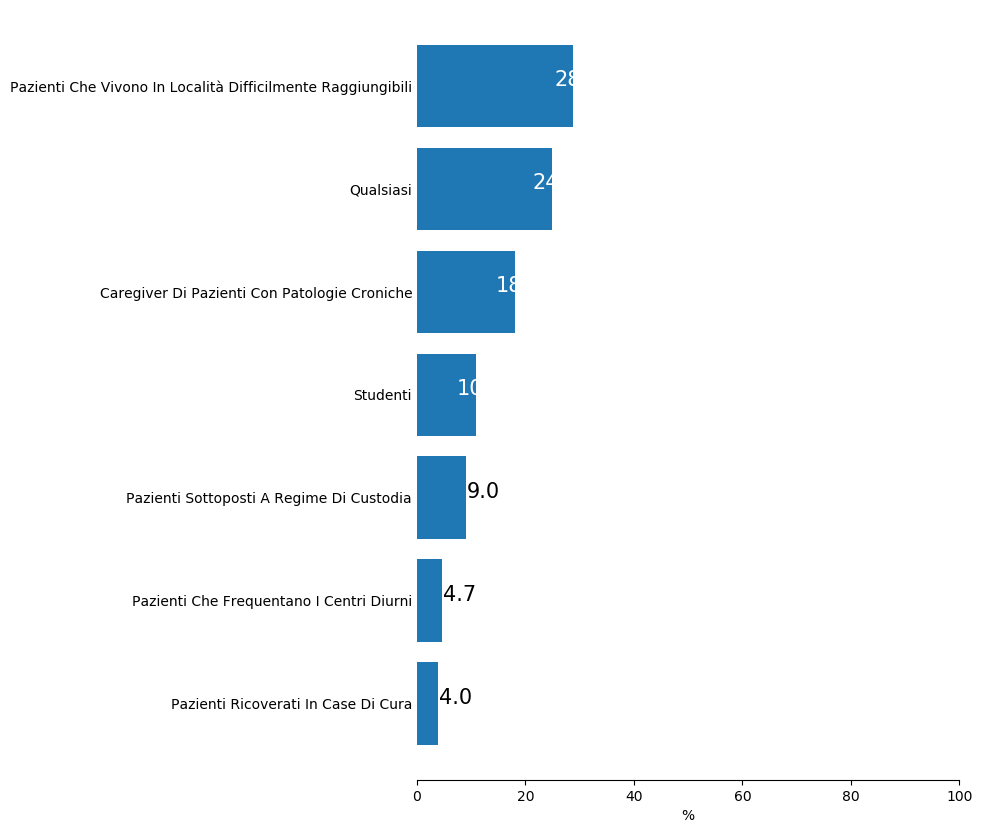

In [25]:
inc=32
# no grafico [o pazzo]
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

Per quali disturbi ritiene che l'uso di strumenti telematici sia più utile e vantaggioso?


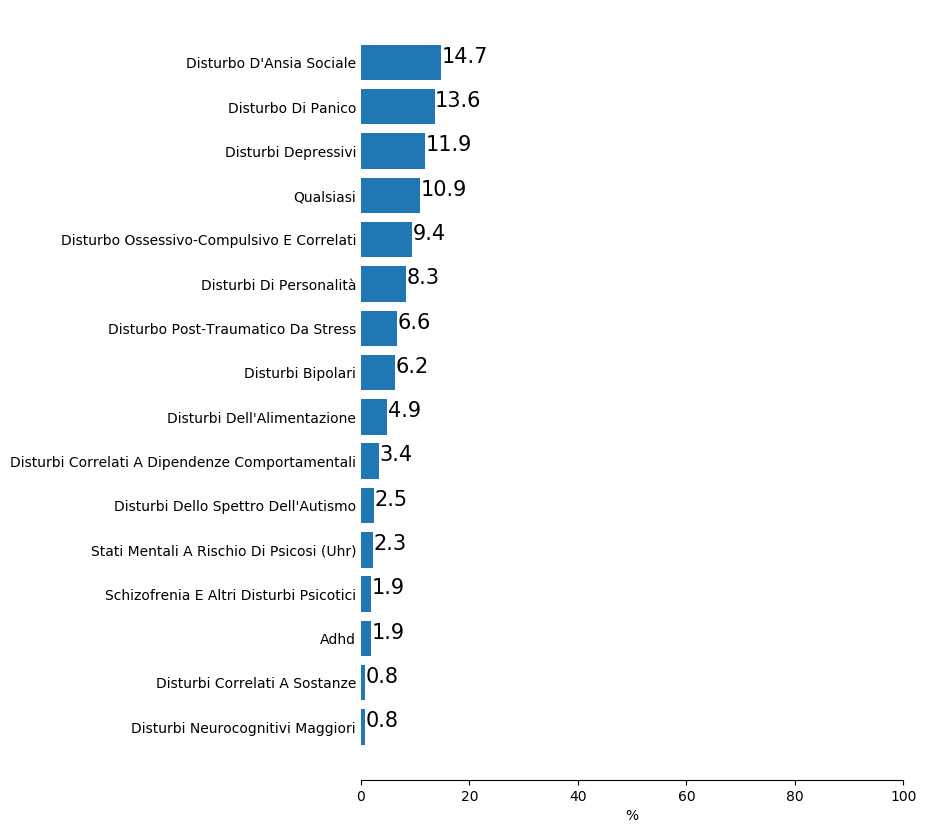

In [26]:
inc=33
print(surv.columns[inc])
surv[surv.columns[inc]]
# no grafico [o pazzo]
services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

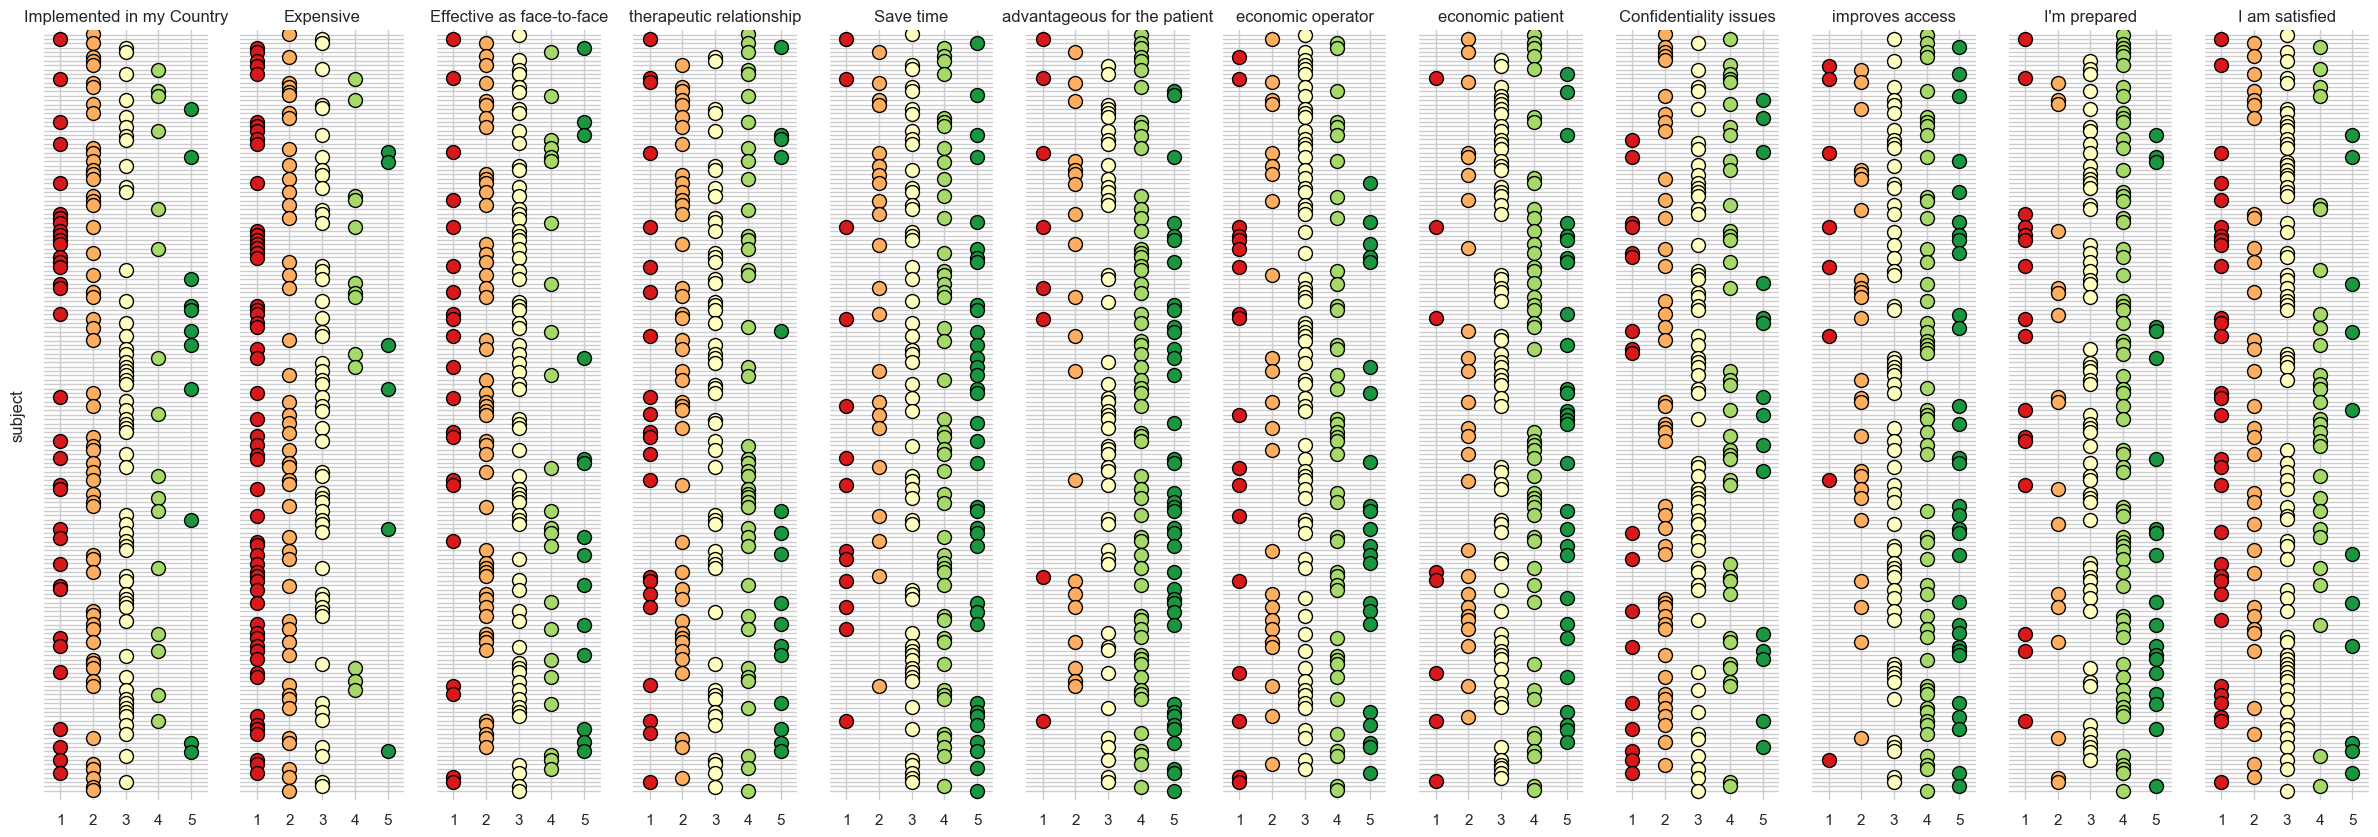

In [509]:

likert = surv.iloc[:,[34,35,36,37,38,39,40,41,42,43,44,60]].dropna(axis=0,how="all").fillna(3) # 1 subject is all nan and 1 subject skipped one item [in this subject the answer is replaced with neutral 3]

likert = likert.reset_index().rename(columns= {"index":"subject"})

import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(likert,
                 x_vars=likert.columns[1:], y_vars=["subject"],
                 height=10, aspect=.25,)


def mystrip(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    sns.stripplot(x, y, edgecolor="black", palette=[col[i] for i in x], size=10, orient="h",
    linewidth=1)
    
# Draw a dot plot using the stripplot function
g.map(mystrip)#color="purple")

g.set(xlim=(0.5, 5.5), ylim=(len(likert)+1.1,-1.1,), xlabel="", xticks=[1,2,3,4,5],yticklabels=[])

# Use semantically meaningful titles for the columns
titles = ["Implemented in my Country","Expensive","Effective as face-to-face",
          "therapeutic relationship","Save time",
        "advantageous for the patient","economic operator",
          "economic patient","Confidentiality issues","improves access","I'm prepared","I am satisfied","Reduces stigma"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)

plt.show()


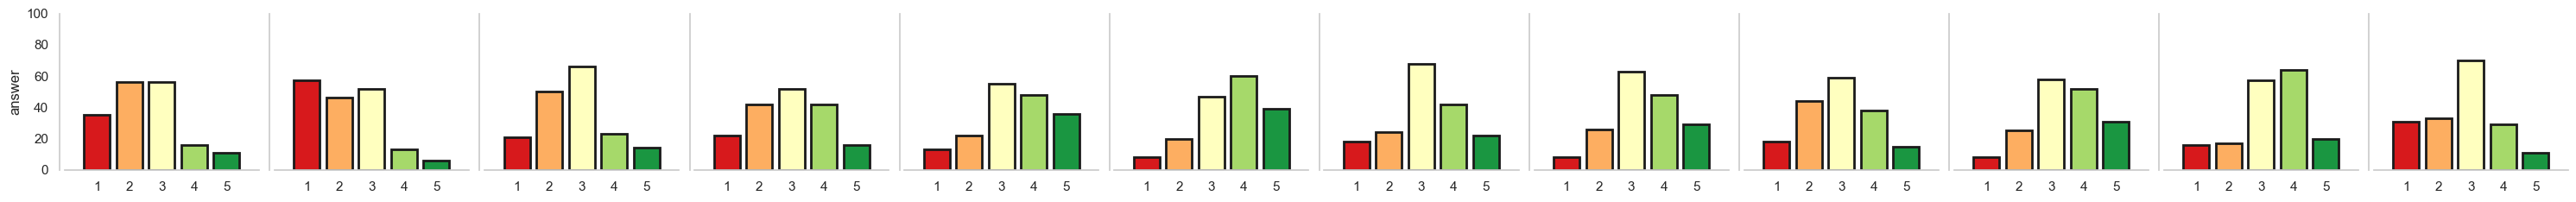

In [510]:
likert = surv.iloc[:,[34,35,36,37,38,39,40,41,42,43,44,60]].dropna(axis=0,how="all").fillna(3)
likert_f = likert.agg(pd.value_counts).fillna(0).reset_index().rename(columns={"index":"answer"})

g = sns.PairGrid(likert_f,
                 x_vars=likert_f.columns[1:], y_vars=["answer"],aspect=1,)

def mybar(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    plt.bar(y,x,color=['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],edgecolor="k",linewidth=2)

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    #ax.set(title=title)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_position(('outward', 4))
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

g.map(mybar)
g.set(xlim=(0, 6), ylim=(0,100),xlabel="",xticks=[1,2,3,4,5])

plt.tight_layout()


Con quali modalità erogava le sue prestazioni PRIMA dell'emergenza?


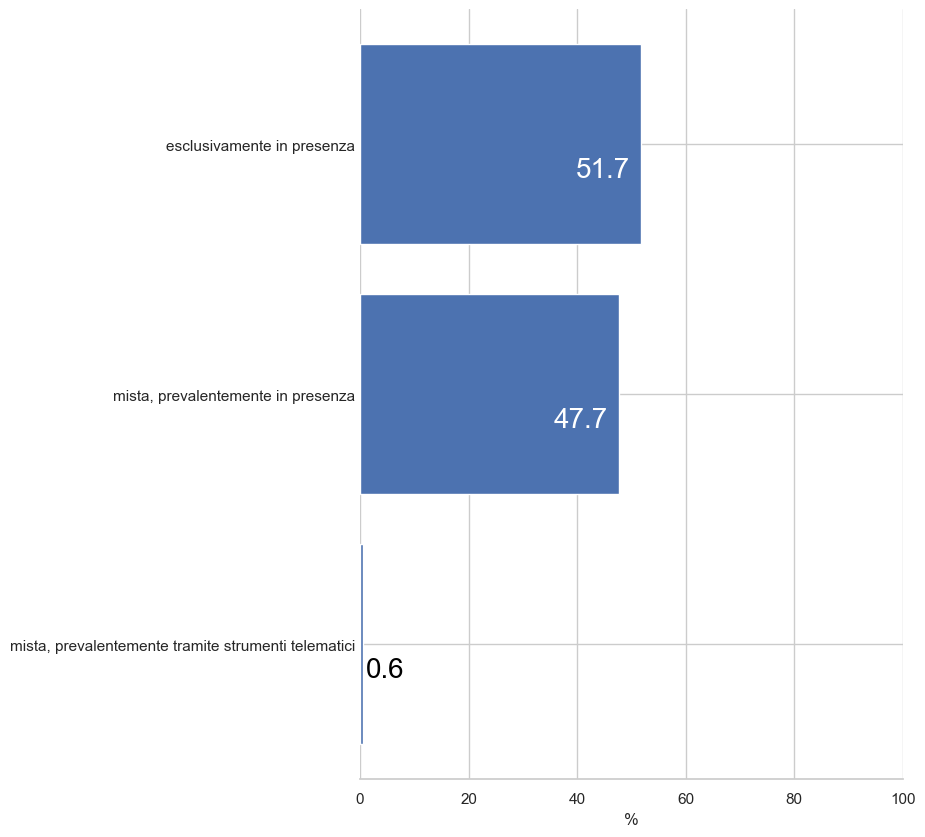

In [29]:
inc=47
print(surv.columns[inc])
surv[surv.columns[inc]]

worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()



Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Fornire consulenze a MMG/altro specialista].1


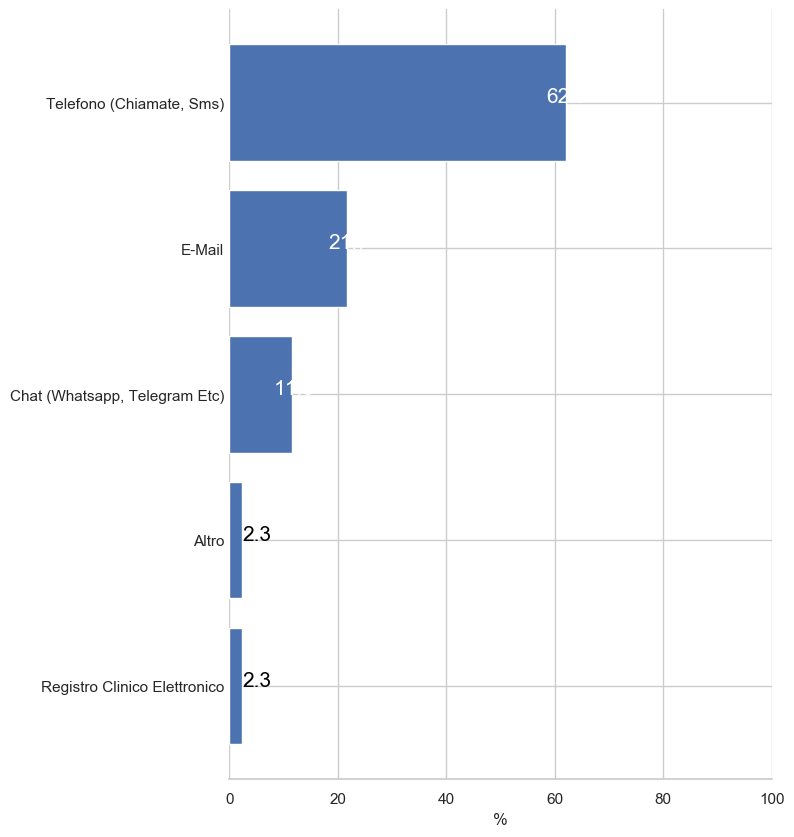

In [30]:
inc=48
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Chiedere consulenze ad altri specialisti].1


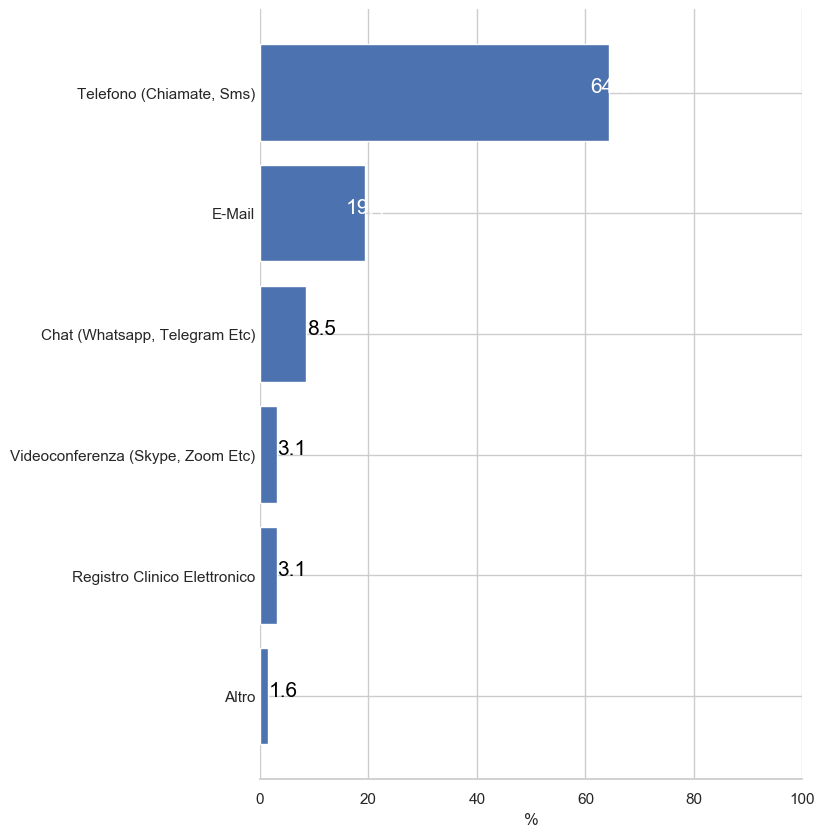

In [31]:
inc=49
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

In [32]:
for i,c in enumerate(surv.columns[34:44]):
    print(i,c)

0 L'impiego di strumenti telematici per la salute mentale è a un buon livello di implementazione in Italia
1 L'impiego di strumenti telematici per la salute mentale ha costi elevati
2 L'impiego di strumenti telematici per la salute mentale è un approccio valido, accurato ed efficace tanto quanto la pratica clinica in presenza
3 L'impiego di strumenti telematici per la salute mentale consente di stabilire una buona relazione medico-paziente
4 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini di tempo per l'operatore
5 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini di tempo per il paziente
6 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini economici per l'operatore
7 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini economici per il paziente
8 L'impiego di strumenti telematici per la salute mentale presenta problemi di confidenzialità tali da limitarne l'utilizz

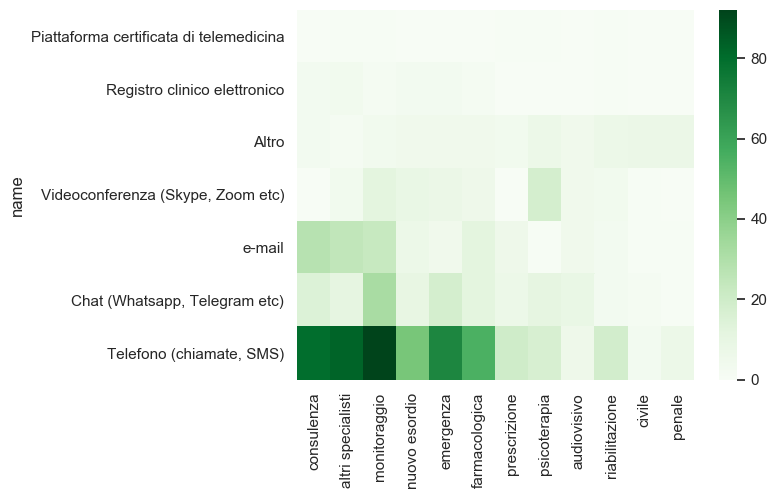

In [33]:
surv[surv.columns[48:-1]].dropna().apply(lambda x: x.value_counts())

cols = ["consulenza","altri specialisti","monitoraggio","nuovo esordio","emergenza","farmacologica","prescrizione","psicoterapia", "audiovisivo","riabilitazione","civile","penale"]
rows = ["Piattaforma certificata di telemedicina", "Registro clinico elettronico", "Altro", "Videoconferenza (Skype, Zoom etc)", "e-mail", "Chat (Whatsapp, Telegram etc)", "Telefono (chiamate, SMS)"]

tool = pd.DataFrame(rows,columns=["name"])


for i,c in enumerate(surv.columns[48:-1]):
    services = surv[c].dropna()
    r = re.compile(r'(?:[^,(]|\([^)]*\))+')
    services = [s.strip() for serv in services for s in r.findall(serv)]
    services = pd.DataFrame(Counter(services).most_common(),columns=("name",cols[i])).sort_values(by=cols[i]).reset_index(drop=True)

    tool = pd.merge(tool,services,on="name",how="outer")

tool = tool.set_index("name")

sns.heatmap(tool.fillna(0),cmap="Greens")

In [513]:
[print(i,c) for i,c  in enumerate(surv.columns) ]

0 Età
1 Genere
2 Regione di appartenenza della struttura sanitaria in cui opera
3 Tipologia della struttura sanitaria
4 Ruolo professionale (è possibile indicare più di 1 risposta)
5 Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza? 
6 Se ha risposto sì, qual è stata la motivazione principale del calo? 
7 Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:
8 Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?
9 La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?
10 Quali tra i seguenti strumenti telematici ha utilizzato DURANTE l'emergenza per raggiungere e fornire supporto ai pazienti?
11 Gli strumenti telematici da lei utilizzati sono personali o le sono stati forniti dalla struttura di appartenenza?
12 Quale percentuale delle sue prestazioni ha erogato tramite strumenti telematici DURANTE l'emergenza?
13 Quanto ritiene che gli strumenti telematici le siano stati ut

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [512]:
enumerate(surv.columns)